In [1]:
import pandas as pd 
from pandas import DataFrame
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show, savefig, xlim, figure, \
                ylim, legend, boxplot, setp, axes

# 10-year flood

In [86]:
df1 = pd.read_csv('10_100_3of5.csv')
df11 = pd.read_csv('10_10_3of5.csv')
df12 = pd.read_csv('10_30_3of5.csv')
df13 = pd.read_csv('10_50_3of5.csv')
# df11

,who,color,heading,xcor,ycor,shape,label,label-color,breed,hidden?,...,damage_pct_100y,moved?,mot_year,ori_year,normal_inf?,poor_inf?,ori_moved?,nearhouse,move,nbpast_move
0,0,19,262,-664.795536,146.777179,"""circle""","""""",9.9,{breed poors},False,...,0.705,True,1,1,0,0,True,{turtles 250 1271 5257 1701 4599},0,2
1,1,89,303,-832.836964,111.764114,"""triangle""","""""",9.9,{breed normals},False,...,0.587,True,0,0,0,0,True,0,0,2
2,2,39,32,-250.574776,517.364636,"""triangle""","""""",9.9,{breed normals},False,...,0.524,True,0,0,0,0,True,0,0,2
3,3,39,206,-664.866484,88.138276,"""triangle""","""""",9.9,{breed normals},False,...,0.632,True,0,0,0,0,True,0,0,2
4,4,29,262,-465.158394,513.367872,"""triangle""","""""",9.9,{breed normals},False,...,0.407,True,0,0,0,0,True,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,5861,25,166,-516.111213,671.358269,"""triangle""","""""",9.9,{breed normals},False,...,0.000,False,200,200,0,0,False,{turtles 4302 354 302 3379 4483},0,2
5862,5862,35,236,-609.715881,545.472051,"""triangle""","""""",9.9,{breed normals},False,...,0.000,False,200,200,0,0,False,{turtles 3885 1349 2594 5525 5259},0,2
5863,5863,39,345,-304.566554,599.818571,"""triangle""","""""",9.9,{breed normals},False,...,0.407,True,0,0,0,0,True,0,0,2
5864,5864,59,127,-389.728356,449.963599,"""triangle""","""""",9.9,{breed normals},False,...,0.587,True,0,0,0,0,True,0,0,2


In [114]:
# To see how much faster does the neighborhood effect does to encourage self-relocation 
df1['year_diff'] = df1.apply(lambda row: row.mot_year - row.ori_year, axis = 1)
df11['year_diff'] = df11.apply(lambda row: row.mot_year - row.ori_year, axis = 1)
df12['year_diff'] = df12.apply(lambda row: row.mot_year - row.ori_year, axis = 1)
df13['year_diff'] = df13.apply(lambda row: row.mot_year - row.ori_year, axis = 1)

# df11['year_diff'] = df11.apply(lambda row: row.ori_year - row.mot_year, axis = 1) 
# df11['year_diff'] = df11.apply(lambda row: row.ori_year - row.mot_year, axis = 1) 
# df12['year_diff'] = df12.apply(lambda row: row.ori_year - row.mot_year, axis = 1) 
# df13['year_diff'] = df13.apply(lambda row: row.ori_year - row.mot_year, axis = 1) 


<Figure size 432x288 with 0 Axes>

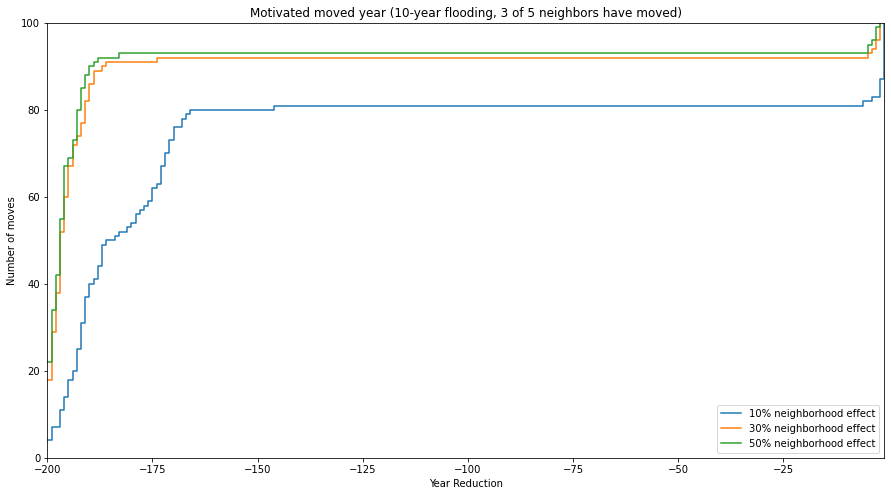

In [123]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Motivated moved year (10-year flooding, 3 of 5 neighbors have moved)')

df11.year_diff.value_counts().sort_index().cumsum().plot(ds='steps-post')
df12.year_diff.value_counts().sort_index().cumsum().plot(ds='steps-post')
df13.year_diff.value_counts().sort_index().cumsum().plot(ds='steps-post')

plt.xlim([-200,-1])
plt.ylim([0,100])

plt.ylabel('Number of moves')
plt.xlabel('Year Reduction')

plt.legend(labels=['10% neighborhood effect','30% neighborhood effect','50% neighborhood effect']) 

plt.show()

>> There are a lot of people who move out only a couple of years. This might confirm the free rider problem

In [102]:
df11_diff = df11.year_diff.value_counts().sort_index() 
# df11_diff

In [107]:
df12.year_diff.value_counts().sort_index() 

0      5728
1        33
2         9
3         2
4         1
5         1
174       1
186       1
187       1
189       3
190       4
191       5
192       3
193       2
194       5
195       7
196       8
197      14
198       9
199      11
200      18
Name: year_diff, dtype: int64

In [ ]:
# df13.year_diff.value_counts().sort_index() 

In [ ]:
# df11.breed.value_counts()

In [ ]:
# df11.mot_year.value_counts().sort_index() 

In [ ]:
# df11_notmove = df11[df11['mot_year']==200]
# df12_notmove = df12[df12['mot_year']==200]
# df13_notmove = df13[df13['mot_year']==200]

# df11_notmove_normal = df11_notmove[df11_notmove['breed']=='{breed normals}']
# df12_notmove_normal = df12_notmove[df12_notmove['breed']=='{breed normals}']
# df13_notmove_normal = df13_notmove[df13_notmove['breed']=='{breed normals}']

# df11_notmove_poor = df11_notmove[df11_notmove['breed']=='{breed poors}']
# df12_notmove_poor = df12_notmove[df12_notmove['breed']=='{breed poors}']
# df13_notmove_poor = df13_notmove[df13_notmove['breed']=='{breed poors}']

In [ ]:
# df11_notmove

In [ ]:
# df11_tmove = df11[df11['mot_year']!=200]

In [ ]:
# df11_tmove

>> There are difference peaks and troughs of relocation frequency

In [4]:
# To see when people (motivated+self) relocate 
df1_count = df1.mot_year.value_counts().sort_index()
df11_count = df11.mot_year.value_counts().sort_index()
df12_count = df12.mot_year.value_counts().sort_index()
df13_count = df13.mot_year.value_counts().sort_index()
# df1_count


In [ ]:
# df11_count

In [ ]:
# df12_count

In [ ]:
# df13_count

<Figure size 432x288 with 0 Axes>

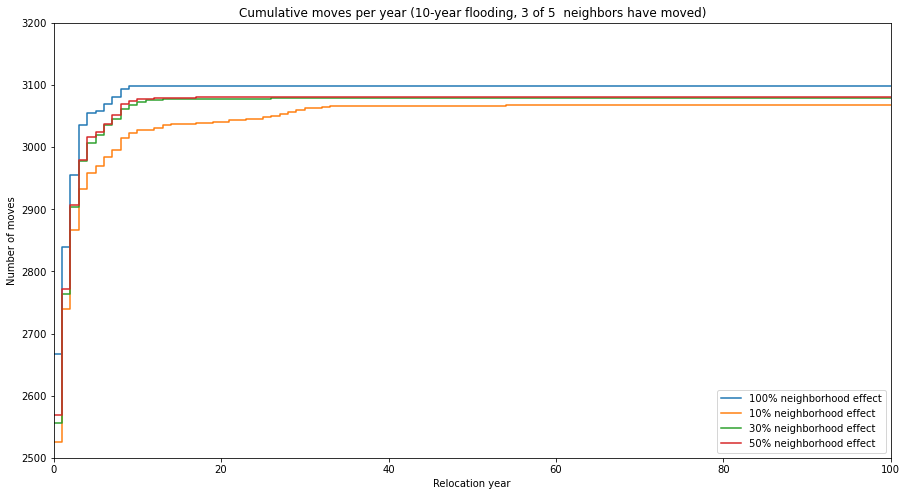

In [142]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative moves per year (10-year flooding, 3 of 5  neighbors have moved)')

df1_count.cumsum().plot(ds='steps-post')
df11_count.cumsum().plot(ds='steps-post')
df12_count.cumsum().plot(ds='steps-post')
df13_count.cumsum().plot(ds='steps-post')

plt.xlim([0,100])
plt.ylim([2500,3200])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['100% neighborhood effect','10% neighborhood effect','30% neighborhood effect','50% neighborhood effect']) 

plt.show()

>> It is reasonable that the starting point is not the same since there are people who move right away and neighborhood effect comes into play

In [6]:
df1_count_ori = df1.ori_year.value_counts().sort_index()
df11_count_ori = df11.ori_year.value_counts().sort_index()
df12_count_ori = df12.ori_year.value_counts().sort_index()
df13_count_ori = df13.ori_year.value_counts().sort_index()
# df13_count_ori

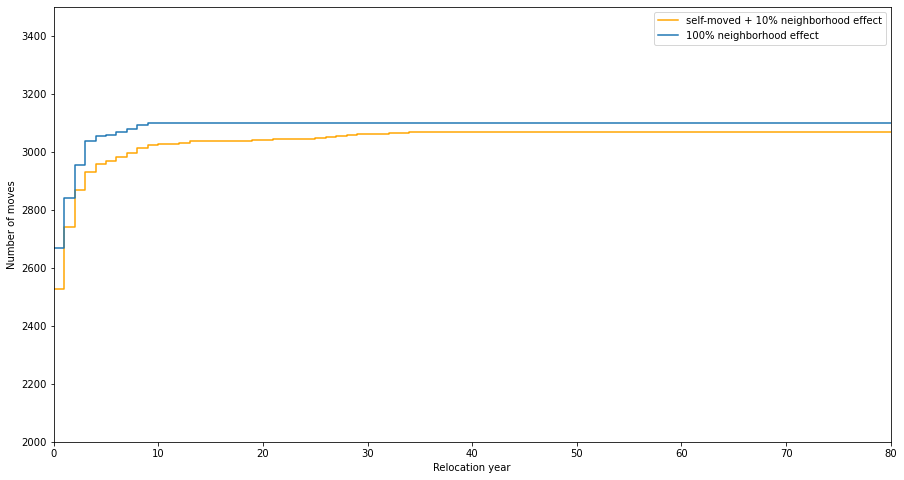

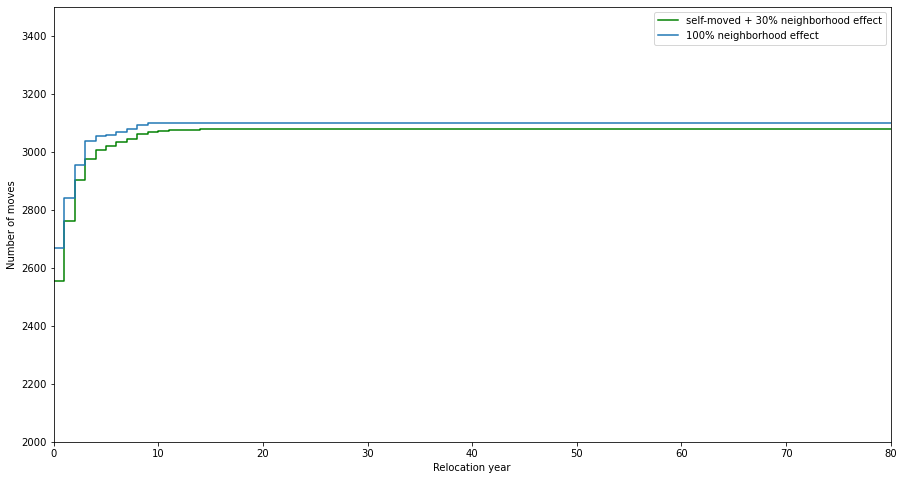

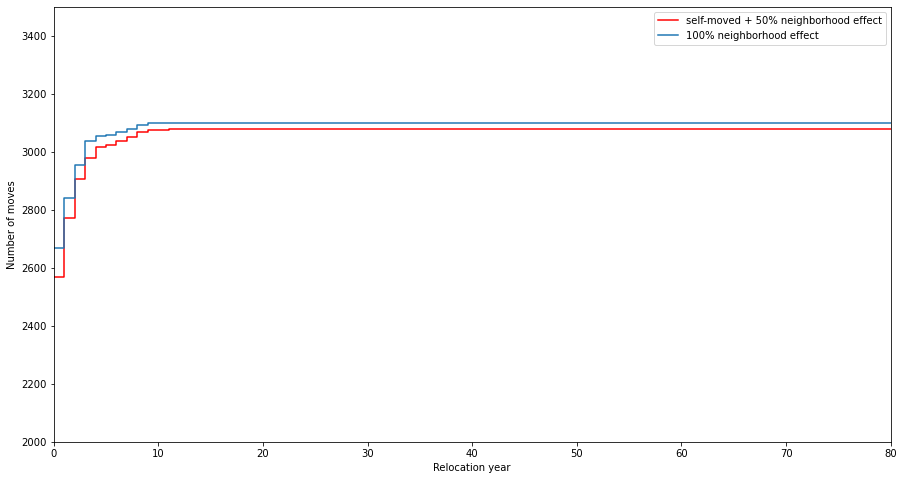

In [7]:
fig = figure(figsize=(15, 8))
plot2 = plt.figure(1)
df11_count.cumsum().plot(ds='steps-post',color ='orange')
df1_count.cumsum().plot(ds='steps-post')
plt.xlim([0,80])
plt.ylim([2000,3500])
plt.ylabel('Number of moves')
plt.xlabel('Relocation year')
plt.legend(labels=['self-moved + 10% neighborhood effect','100% neighborhood effect'])

fig = figure(figsize=(15, 8))
plot3 = plt.figure(2)
df12_count.cumsum().plot(ds='steps-post',color ='green')
df1_count.cumsum().plot(ds='steps-post')
plt.xlim([0,80])
plt.ylim([2000,3500])
plt.ylabel('Number of moves')
plt.xlabel('Relocation year')
plt.legend(labels=['self-moved + 30% neighborhood effect','100% neighborhood effect'])

fig = figure(figsize=(15, 8))
plot4 = plt.figure(3)
df13_count.cumsum().plot(ds='steps-post',color ='red')
df1_count.cumsum().plot(ds='steps-post')
plt.xlim([0,80])
plt.ylim([2000,3500])
plt.ylabel('Number of moves')
plt.xlabel('Relocation year')
plt.legend(labels=['self-moved + 50% neighborhood effect','100% neighborhood effect'])

plt.show()

In [8]:
df1_nb = pd.read_csv('10_100_3of5.csv')
df11_nb = pd.read_csv('10_10_3of5.csv')
df12_nb = pd.read_csv('10_30_3of5.csv')
df13_nb = pd.read_csv('10_50_3of5.csv')


In [9]:

index_name = df11_nb[(df11_nb['normal_inf?'] == '0') & (df11_nb['poor_inf?'] == '0')].index 
df11_nb.drop(index_name, inplace = True) 

index_name = df12_nb[(df12_nb['normal_inf?'] == '0') & (df12_nb['poor_inf?'] == '0')].index 
df12_nb.drop(index_name, inplace = True)

index_name = df13_nb[(df13_nb['normal_inf?'] == '0') & (df13_nb['poor_inf?'] == '0')].index 
df13_nb.drop(index_name, inplace = True)

In [10]:
index_name = df11_nb[(df11_nb['normal_inf?'] == '0') & (df11_nb['poor_inf?'] == '0')].index 
df11_nb.drop(index_name, inplace = True) 

index_name = df12_nb[(df12_nb['normal_inf?'] == '0') & (df12_nb['poor_inf?'] == '0')].index 
df12_nb.drop(index_name, inplace = True)

index_name = df13_nb[(df13_nb['normal_inf?'] == '0') & (df13_nb['poor_inf?'] == '0')].index 
df13_nb.drop(index_name, inplace = True)



In [128]:
# df11_nb

In [126]:
df11_nb.elevation.value_counts().sort_index()

0.1     1
2.1     1
2.2     1
2.7     2
2.8     1
2.9     1
3.1     3
3.3     1
3.4     6
3.5     3
3.6     3
3.7    20
3.8    13
3.9    12
4.0    10
4.1     5
4.2     5
4.3     5
4.4     2
4.5     4
4.6     1
4.9     1
5.1     1
5.4     1
5.8     2
Name: elevation, dtype: int64

<Figure size 432x288 with 0 Axes>

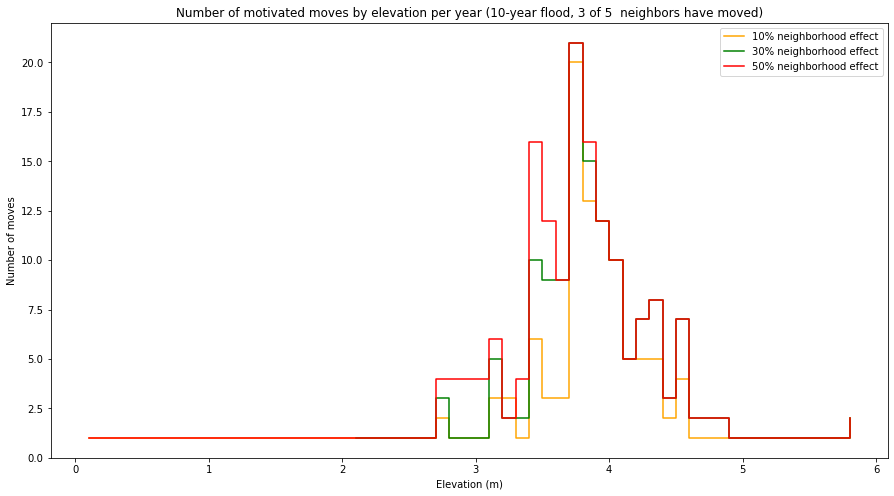

In [136]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Number of motivated moves by elevation per year (10-year flood, 3 of 5  neighbors have moved)')

df11_nb.elevation.value_counts().sort_index().plot(ds='steps-post',color ='orange')
df12_nb.elevation.value_counts().sort_index().plot(ds='steps-post',color ='green')
df13_nb.elevation.value_counts().sort_index().plot(ds='steps-post',color ='red')


# df11_nb.elevation.value_counts().sort_index().cumsum().plot(ds='steps-post',color ='orange')
# df12_nb.elevation.value_counts().sort_index().cumsum().plot(ds='steps-post',color ='green')
# df13_nb.elevation.value_counts().sort_index().cumsum().plot(ds='steps-post',color ='red')

# plt.xlim([0,80])

plt.ylabel('Number of moves')
plt.xlabel('Elevation (m)')

plt.legend(labels=['10% neighborhood effect','30% neighborhood effect','50% neighborhood effect','50% neighborhood effect']) 

plt.show()

In [11]:
df1_count_nb = df1.mot_year.value_counts().sort_index()
df11_count_nb = df11_nb.mot_year.value_counts().sort_index()
df12_count_nb = df12_nb.mot_year.value_counts().sort_index()
df13_count_nb = df13_nb.mot_year.value_counts().sort_index()
# df12_count_nb


<Figure size 432x288 with 0 Axes>

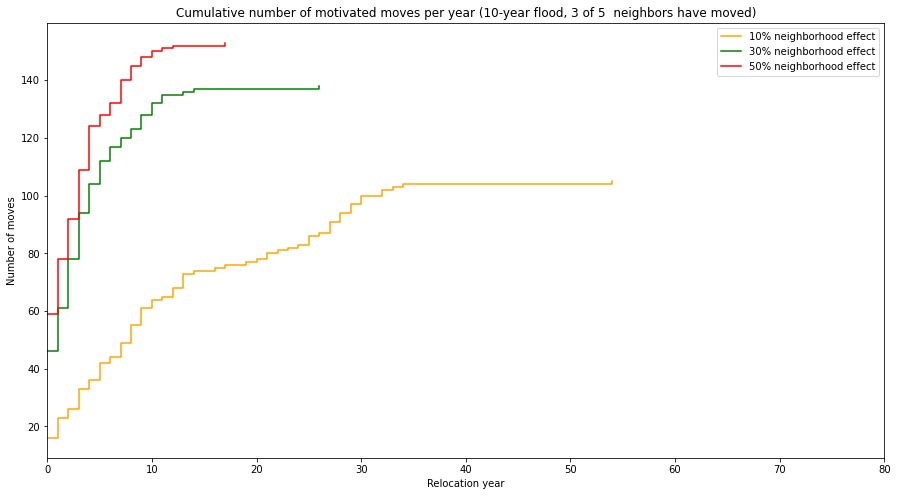

In [19]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative number of motivated moves per year (10-year flood, 3 of 5  neighbors have moved)')

df11_count_nb.cumsum().plot(ds='steps-post',color ='orange')
df12_count_nb.cumsum().plot(ds='steps-post',color ='green')
df13_count_nb.cumsum().plot(ds='steps-post',color ='red')

plt.xlim([0,80])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['10% neighborhood effect','30% neighborhood effect','50% neighborhood effect','50% neighborhood effect']) 

plt.show()

In [13]:

df1_nb_normal = pd.read_csv('10_100_3of5.csv')
df11_nb_normal = pd.read_csv('10_10_3of5.csv')
df12_nb_normal = pd.read_csv('10_30_3of5.csv')
df13_nb_normal = pd.read_csv('10_50_3of5.csv')

df1_nb_poor = pd.read_csv('10_100_3of5.csv')
df11_nb_poor = pd.read_csv('10_10_3of5.csv')
df12_nb_poor = pd.read_csv('10_30_3of5.csv')
df13_nb_poor = pd.read_csv('10_50_3of5.csv')

In [14]:
index_name = df11_nb_normal[(df11_nb_normal['normal_inf?'] == '0')].index 
df11_nb_normal.drop(index_name, inplace = True) 

index_name = df12_nb_normal[(df12_nb_normal['normal_inf?'] == '0')].index 
df12_nb_normal.drop(index_name, inplace = True)

index_name = df13_nb_normal[(df13_nb_normal['normal_inf?'] == '0')].index 
df13_nb_normal.drop(index_name, inplace = True)


index_name = df11_nb_poor[(df11_nb_poor['poor_inf?'] == '0')].index 
df11_nb_poor.drop(index_name, inplace = True) 

index_name = df12_nb_poor[(df12_nb_poor['poor_inf?'] == '0')].index 
df12_nb_poor.drop(index_name, inplace = True)

index_name = df13_nb_poor[(df13_nb_poor['poor_inf?'] == '0')].index 
df13_nb_poor.drop(index_name, inplace = True)



In [15]:
# df11_nb_normal

In [16]:

df11_count_nb_normal = df11_nb_normal.mot_year.value_counts().sort_index()
df12_count_nb_normal = df12_nb_normal.mot_year.value_counts().sort_index()
df13_count_nb_normal = df13_nb_normal.mot_year.value_counts().sort_index()


df11_count_nb_poor = df11_nb_poor.mot_year.value_counts().sort_index()
df12_count_nb_poor = df12_nb_poor.mot_year.value_counts().sort_index()
df13_count_nb_poor = df13_nb_poor.mot_year.value_counts().sort_index()




<Figure size 432x288 with 0 Axes>

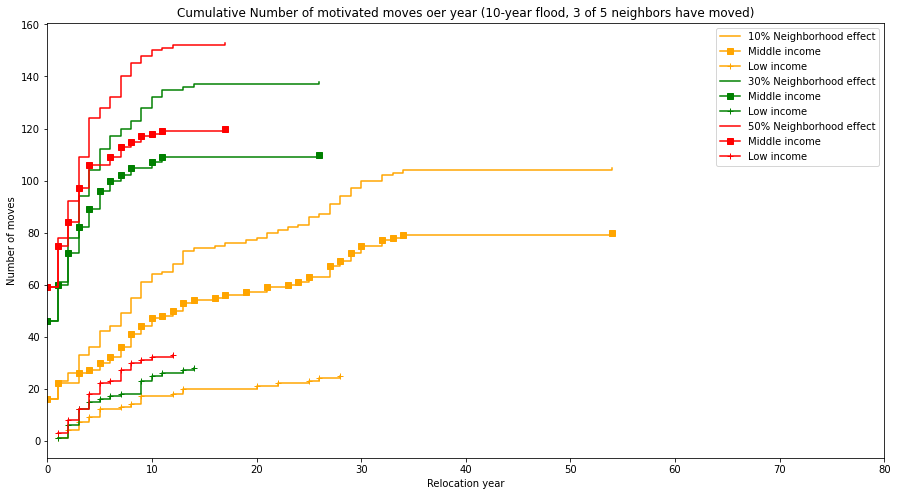

In [18]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative Number of motivated moves oer year (10-year flood, 3 of 5 neighbors have moved)')

df11_count_nb.cumsum().plot(color='orange', ds='steps-post')
df11_count_nb_normal.cumsum().plot(color='orange', Marker="s", ds='steps-post')
df11_count_nb_poor.cumsum().plot(color='orange',Marker="+", ds='steps-post')

df12_count_nb.cumsum().plot(color='green', ds='steps-post')
df12_count_nb_normal.cumsum().plot(color='green', marker="s", ds='steps-post')
df12_count_nb_poor.cumsum().plot(color='green', marker="+", ds='steps-post')


df13_count_nb.cumsum().plot(color='red', ds='steps-post')
df13_count_nb_normal.cumsum().plot(color='red', marker="s", ds='steps-post')
df13_count_nb_poor.cumsum().plot(color='red', marker="+", ds='steps-post')

plt.xlim([0,80])
# plt.ylim([2600,3800])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['10% Neighborhood effect','Middle income', 'Low income',
                   '30% Neighborhood effect','Middle income', 'Low income',
                   '50% Neighborhood effect','Middle income', 'Low income']) 

plt.show()

<Figure size 432x288 with 0 Axes>

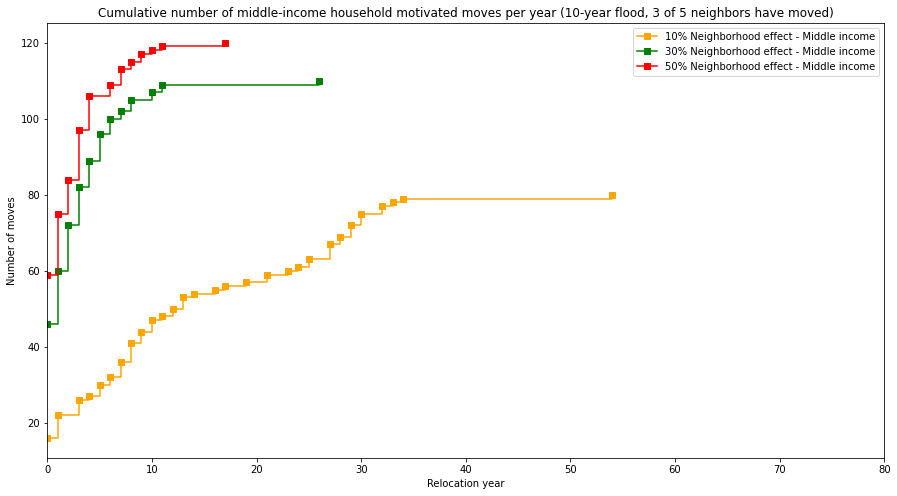

In [21]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative number of middle-income household motivated moves per year (10-year flood, 3 of 5 neighbors have moved)')

df11_count_nb_normal.cumsum().plot(color='orange', Marker="s", ds='steps-post')

df12_count_nb_normal.cumsum().plot(color='green', marker="s", ds='steps-post')

df13_count_nb_normal.cumsum().plot(color='red', marker="s", ds='steps-post')

plt.xlim([0,80])
# plt.ylim([2600,3800])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['10% Neighborhood effect - Middle income',
                   '30% Neighborhood effect - Middle income',
                   '50% Neighborhood effect - Middle income']) 

plt.show()

<Figure size 432x288 with 0 Axes>

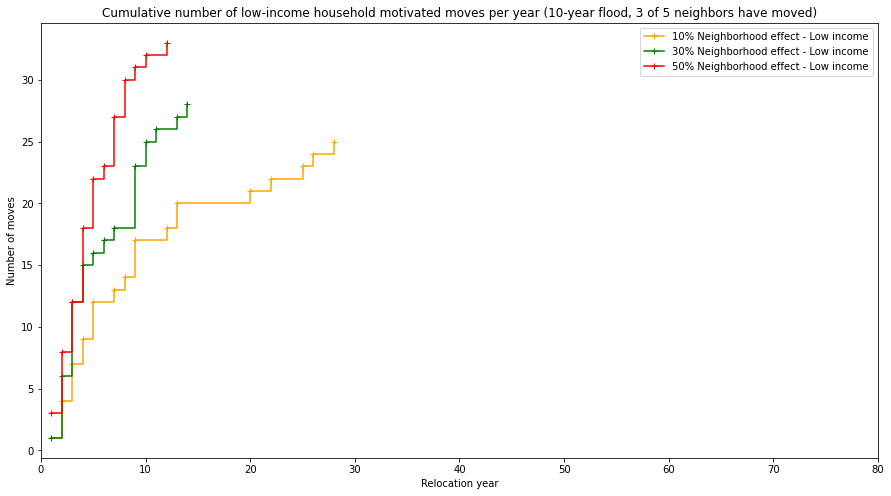

In [22]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative number of low-income household motivated moves per year (10-year flood, 3 of 5 neighbors have moved)')


df11_count_nb_poor.cumsum().plot(color='orange',Marker="+", ds='steps-post')

df12_count_nb_poor.cumsum().plot(color='green', marker="+", ds='steps-post')

df13_count_nb_poor.cumsum().plot(color='red', marker="+", ds='steps-post')

plt.xlim([0,80])
# plt.ylim([2600,3800])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['10% Neighborhood effect - Low income',
                   '30% Neighborhood effect - Low income',
                   '50% Neighborhood effect - Low income']) 

plt.show()

In [23]:
df1_move_nb = pd.read_csv('10_100_3of5.csv')
df11_move_nb = pd.read_csv('10_10_3of5.csv')
df12_move_nb = pd.read_csv('10_30_3of5.csv')
df13_move_nb = pd.read_csv('10_50_3of5.csv')

In [ ]:
# df11_move_nb = df11_move_nb[(df11_move_nb['normal_inf?'] == '0') & (df11_move_nb['poor_inf?'] == '0')]
# df12_move_nb = df12_move_nb[(df12_move_nb['normal_inf?'] == '0') & (df12_move_nb['poor_inf?'] == '0')]
# df13_move_nb = df13_move_nb[(df13_move_nb['normal_inf?'] == '0') & (df13_move_nb['poor_inf?'] == '0')]

In [ ]:
# df13_move_nb.breed.value_counts()

In [ ]:
# df13_move_nb[df13_move_nb['breed']=='{breed poors}']

In [ ]:

# df11_move_nb_normal = df11_move_nb[df11_move_nb['breed']=='{breed normals}'].mot_year.value_counts().sort_index().cumsum()
# df12_move_nb_normal = df12_move_nb[df12_move_nb['breed']=='{breed normals}'].mot_year.value_counts().sort_index().cumsum()
# df13_move_nb_normal = df13_move_nb[df13_move_nb['breed']=='{breed normals}'].mot_year.value_counts().sort_index().cumsum()


# df11_move_nb_poor = df11_move_nb[df11_move_nb['breed']=='{breed poors}'].mot_year.value_counts().sort_index().cumsum()
# df12_move_nb_poor = df12_move_nb[df12_move_nb['breed']=='{breed poors}'].mot_year.value_counts().sort_index().cumsum()
# df13_move_nb_poor = df13_move_nb[df13_move_nb['breed']=='{breed poors}'].mot_year.value_counts().sort_index().cumsum()


In [ ]:

# df11_move_nb_normal = df11_move_nb[df11_move_nb['breed']=='{breed normals}'].mot_year.value_counts().sort_index()
# df12_move_nb_normal = df12_move_nb[df12_move_nb['breed']=='{breed normals}'].mot_year.value_counts().sort_index()
# df13_move_nb_normal = df13_move_nb[df13_move_nb['breed']=='{breed normals}'].mot_year.value_counts().sort_index()


# df11_move_nb_poor = df11_move_nb[df11_move_nb['breed']=='{breed poors}'].mot_year.value_counts().sort_index()
# df12_move_nb_poor = df12_move_nb[df12_move_nb['breed']=='{breed poors}'].mot_year.value_counts().sort_index()
# df13_move_nb_poor = df13_move_nb[df13_move_nb['breed']=='{breed poors}'].mot_year.value_counts().sort_index()

In [ ]:

# df11_mmove_nb_normal = df11_nb[df11_nb['breed']=='{breed normals}'].mot_year.value_counts().sort_index().cumsum()
# df12_mmove_nb_normal = df12_nb[df12_nb['breed']=='{breed normals}'].mot_year.value_counts().sort_index().cumsum()
# df13_mmove_nb_normal = df13_nb[df13_nb['breed']=='{breed normals}'].mot_year.value_counts().sort_index().cumsum()


# df11_mmove_nb_poor = df11_nb[df11_nb['breed']=='{breed poors}'].mot_year.value_counts().sort_index().cumsum()
# df12_mmove_nb_poor = df12_nb[df12_nb['breed']=='{breed poors}'].mot_year.value_counts().sort_index().cumsum()
# df13_mmove_nb_poor = df13_nb[df13_nb['breed']=='{breed poors}'].mot_year.value_counts().sort_index().cumsum()


In [ ]:
# df13_mmove_nb_normal

In [ ]:
# len(df13_nb)

In [ ]:
# df13_mmove_nb_poor

In [ ]:
# df13_mmove_nb_poor/len(df13_nb)

In [ ]:
# df13_mmove_nb_normal

In [ ]:
# df13_mmove_nb_normal/len(df13_nb)

In [ ]:
# df13_move_nb_poor

In [25]:
# # clear current figure
# plt.clf()
# fig = figure(figsize=(15, 8))
# plt.title('Number of motivated moves of the following year (10 year, 3 of 5 neighbors have moved)')

# (df11_mmove_nb_normal/len(df11_nb)).plot(color='orange', Marker="s", ds='steps-post')
# (df11_mmove_nb_poor/len(df11_nb)).plot(color='orange',Marker="+", ds='steps-post')

# (df12_mmove_nb_normal/len(df12_nb)).plot(color='green', Marker="s", ds='steps-post')
# (df12_mmove_nb_poor/len(df12_nb)).plot(color='green',Marker="+", ds='steps-post')

# (df13_mmove_nb_normal/len(df13_nb)).plot(color='red', Marker="s", ds='steps-post')
# (df13_mmove_nb_poor/len(df13_nb)).plot(color='red',Marker="+", ds='steps-post')

# plt.xlim([0,80])
# # plt.ylim([2600,3800])

# plt.ylabel('Number of moves')
# plt.xlabel('Relocation year')

# plt.legend(labels=['10% Neighborhood effect','Middle income', 'Low income',
#                    '30% Neighborhood effect','Middle income', 'Low income',
#                    '50% Neighborhood effect','Middle income', 'Low income']) 

# plt.show()

In [26]:
df1_nb_Obj = pd.read_csv('10_100_3of5_Obj.csv')
df11_nb_Obj = pd.read_csv('10_10_3of5_Obj.csv')
df12_nb_Obj = pd.read_csv('10_30_3of5_Obj.csv')
df13_nb_Obj = pd.read_csv('10_50_3of5_Obj.csv')

<Figure size 432x288 with 0 Axes>

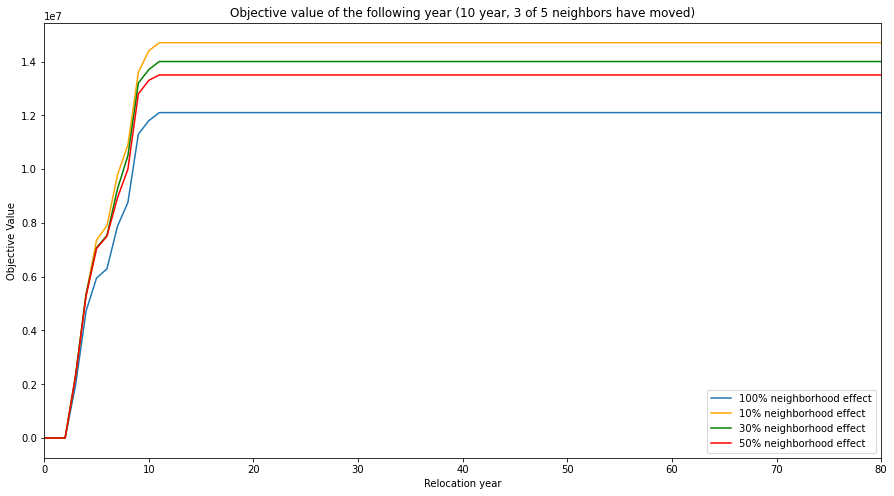

In [27]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Objective value of the following year (10 year, 3 of 5 neighbors have moved)')

df1_nb_Obj.Objective.plot()
df11_nb_Obj.Objective.plot(color='orange')
df12_nb_Obj.Objective.plot(color='green')
df13_nb_Obj.Objective.plot(color='red')

plt.xlim([0,80])

plt.ylabel('Objective Value')
plt.xlabel('Relocation year')

plt.legend(labels=['100% neighborhood effect','10% neighborhood effect','30% neighborhood effect','50% neighborhood effect']) 

plt.show()


In [28]:
df2 = pd.read_csv('10_100_3of7.csv')
df21 = pd.read_csv('10_10_3of7.csv')
df22 = pd.read_csv('10_30_3of7.csv')
df23 = pd.read_csv('10_50_3of7.csv')

In [29]:
# To see how much faster does the neighborhood effect does to encourage self-relocation 
df2['year_diff'] = df2.apply(lambda row: row.ori_year - row.mot_year, axis = 1) 
df21['year_diff'] = df21.apply(lambda row: row.ori_year - row.mot_year, axis = 1) 
df22['year_diff'] = df22.apply(lambda row: row.ori_year - row.mot_year, axis = 1) 
df23['year_diff'] = df23.apply(lambda row: row.ori_year - row.mot_year, axis = 1) 


In [30]:
# To see when people (motivated+self) relocate 
df2_count = df2.mot_year.value_counts().sort_index()
df21_count = df21.mot_year.value_counts().sort_index()
df22_count = df22.mot_year.value_counts().sort_index()
df23_count = df23.mot_year.value_counts().sort_index()


<Figure size 432x288 with 0 Axes>

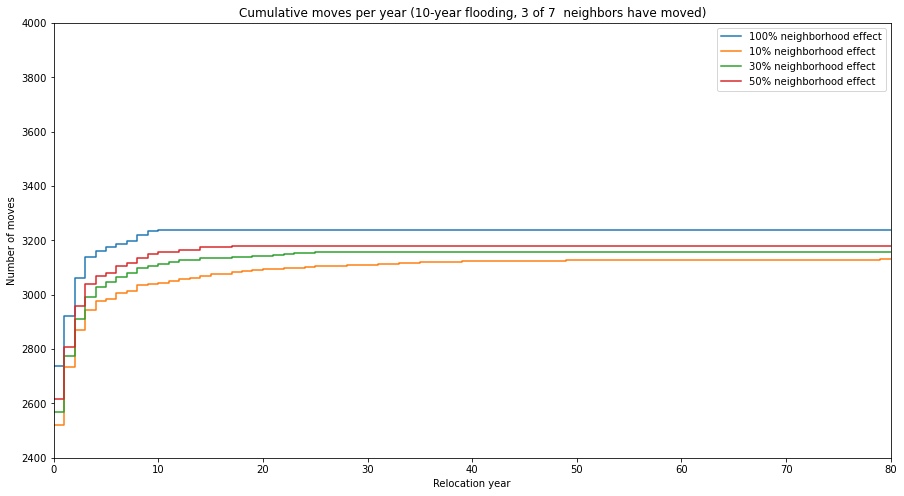

In [58]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative moves per year (10-year flooding, 3 of 7  neighbors have moved)')

df2_count.cumsum().plot(ds='steps-post')
df21_count.cumsum().plot(ds='steps-post')
df22_count.cumsum().plot(ds='steps-post')
df23_count.cumsum().plot(ds='steps-post')

plt.xlim([0,80])
plt.ylim([2400,4000])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['100% neighborhood effect','10% neighborhood effect','30% neighborhood effect','50% neighborhood effect']) 

plt.show()

In [32]:
df2_count_ori = df2.ori_year.value_counts().sort_index()
df21_count_ori = df21.ori_year.value_counts().sort_index()
df22_count_ori = df22.ori_year.value_counts().sort_index()
df23_count_ori = df23.ori_year.value_counts().sort_index()


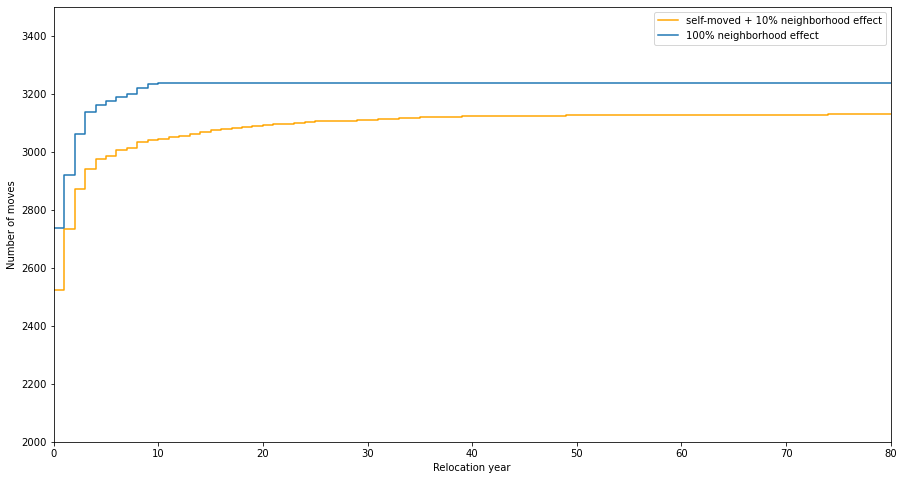

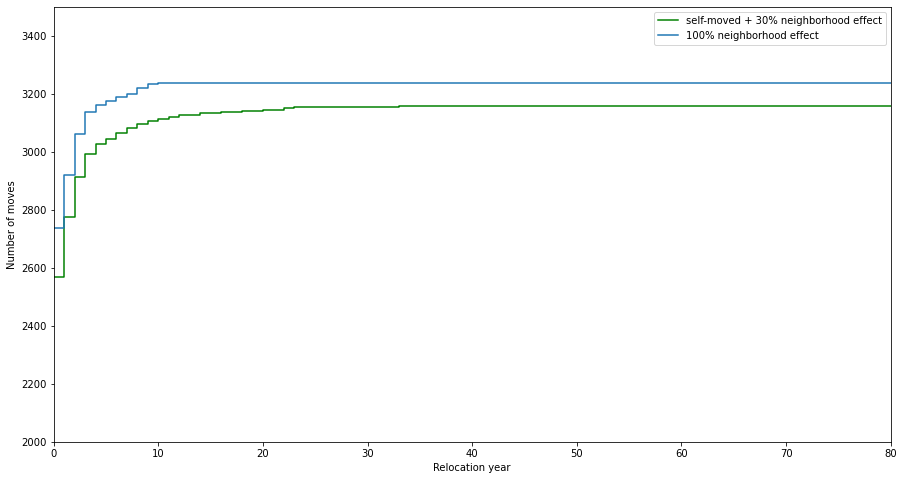

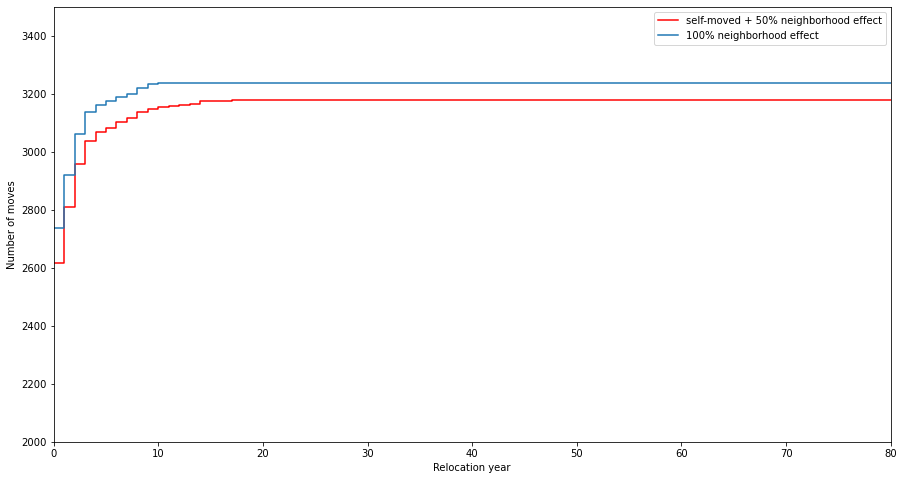

In [33]:
fig = figure(figsize=(15, 8))
plot2 = plt.figure(1)
df21_count.cumsum().plot(ds='steps-post',color ='orange')
df2_count.cumsum().plot(ds='steps-post')
plt.xlim([0,80])
plt.ylim([2000,3500])
plt.ylabel('Number of moves')
plt.xlabel('Relocation year')
plt.legend(labels=['self-moved + 10% neighborhood effect','100% neighborhood effect'])

fig = figure(figsize=(15, 8))
plot3 = plt.figure(2)
df22_count.cumsum().plot(ds='steps-post',color ='green')
df2_count.cumsum().plot(ds='steps-post')
plt.xlim([0,80])
plt.ylim([2000,3500])
plt.ylabel('Number of moves')
plt.xlabel('Relocation year')
plt.legend(labels=['self-moved + 30% neighborhood effect','100% neighborhood effect'])

fig = figure(figsize=(15, 8))
plot4 = plt.figure(3)
df23_count.cumsum().plot(ds='steps-post',color ='red')
df2_count.cumsum().plot(ds='steps-post')
plt.xlim([0,80])
plt.ylim([2000,3500])
plt.ylabel('Number of moves')
plt.xlabel('Relocation year')
plt.legend(labels=['self-moved + 50% neighborhood effect','100% neighborhood effect'])

plt.show()

In [34]:
df2_nb = pd.read_csv('10_100_3of7.csv')
df21_nb = pd.read_csv('10_10_3of7.csv')
df22_nb = pd.read_csv('10_30_3of7.csv')
df23_nb = pd.read_csv('10_50_3of7.csv')


In [36]:

index_name = df21_nb[(df21_nb['normal_inf?'] == '0') & (df21_nb['poor_inf?'] == '0')].index 
df21_nb.drop(index_name, inplace = True) 

index_name = df22_nb[(df22_nb['normal_inf?'] == '0') & (df22_nb['poor_inf?'] == '0')].index 
df22_nb.drop(index_name, inplace = True)

index_name = df23_nb[(df23_nb['normal_inf?'] == '0') & (df23_nb['poor_inf?'] == '0')].index 
df23_nb.drop(index_name, inplace = True)

In [37]:
index_name = df21_nb[(df21_nb['normal_inf?'] == '0') & (df21_nb['poor_inf?'] == '0')].index 
df21_nb.drop(index_name, inplace = True) 

index_name = df22_nb[(df22_nb['normal_inf?'] == '0') & (df22_nb['poor_inf?'] == '0')].index 
df22_nb.drop(index_name, inplace = True)

index_name = df23_nb[(df23_nb['normal_inf?'] == '0') & (df23_nb['poor_inf?'] == '0')].index 
df23_nb.drop(index_name, inplace = True)



In [38]:
df2_count_nb = df2.mot_year.value_counts().sort_index()
df21_count_nb = df21_nb.mot_year.value_counts().sort_index()
df22_count_nb = df22_nb.mot_year.value_counts().sort_index()
df23_count_nb = df23_nb.mot_year.value_counts().sort_index()


<Figure size 432x288 with 0 Axes>

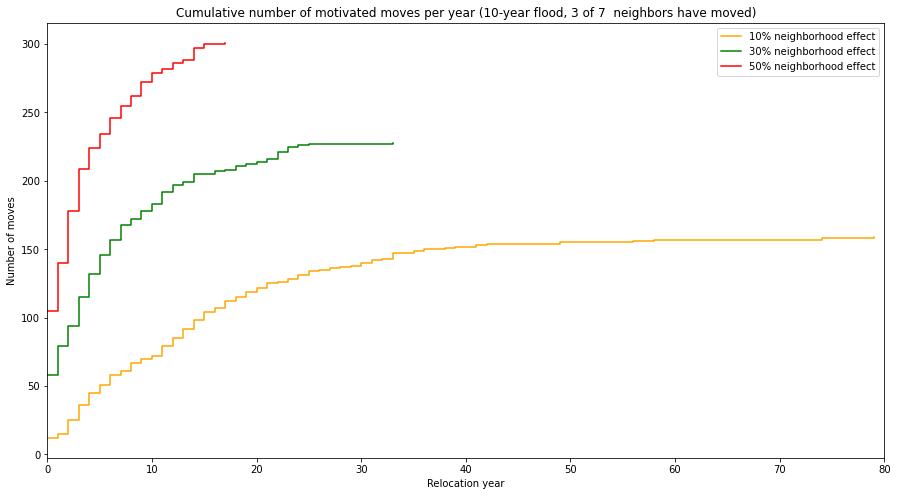

In [80]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative number of motivated moves per year (10-year flood, 3 of 7  neighbors have moved)')

df21_count_nb.cumsum().plot(ds='steps-post',color ='orange')
df22_count_nb.cumsum().plot(ds='steps-post',color ='green')
df23_count_nb.cumsum().plot(ds='steps-post',color ='red')

plt.xlim([0,80])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['10% neighborhood effect','30% neighborhood effect','50% neighborhood effect','50% neighborhood effect']) 

plt.show()

In [40]:

df2_nb_normal = pd.read_csv('10_100_3of7.csv')
df21_nb_normal = pd.read_csv('10_10_3of7.csv')
df22_nb_normal = pd.read_csv('10_30_3of7.csv')
df23_nb_normal = pd.read_csv('10_50_3of7.csv')

df2_nb_poor = pd.read_csv('10_100_3of7.csv')
df21_nb_poor = pd.read_csv('10_10_3of7.csv')
df22_nb_poor = pd.read_csv('10_30_3of7.csv')
df23_nb_poor = pd.read_csv('10_50_3of7.csv')

In [41]:
index_name = df21_nb_normal[(df21_nb_normal['normal_inf?'] == '0')].index 
df21_nb_normal.drop(index_name, inplace = True) 

index_name = df22_nb_normal[(df22_nb_normal['normal_inf?'] == '0')].index 
df22_nb_normal.drop(index_name, inplace = True)

index_name = df23_nb_normal[(df23_nb_normal['normal_inf?'] == '0')].index 
df23_nb_normal.drop(index_name, inplace = True)


index_name = df21_nb_poor[(df21_nb_poor['poor_inf?'] == '0')].index 
df21_nb_poor.drop(index_name, inplace = True) 

index_name = df22_nb_poor[(df22_nb_poor['poor_inf?'] == '0')].index 
df22_nb_poor.drop(index_name, inplace = True)

index_name = df23_nb_poor[(df23_nb_poor['poor_inf?'] == '0')].index 
df23_nb_poor.drop(index_name, inplace = True)



In [42]:

df21_count_nb_normal = df21_nb_normal.mot_year.value_counts().sort_index()
df22_count_nb_normal = df22_nb_normal.mot_year.value_counts().sort_index()
df23_count_nb_normal = df23_nb_normal.mot_year.value_counts().sort_index()


df21_count_nb_poor = df21_nb_poor.mot_year.value_counts().sort_index()
df22_count_nb_poor = df22_nb_poor.mot_year.value_counts().sort_index()
df23_count_nb_poor = df23_nb_poor.mot_year.value_counts().sort_index()




<Figure size 432x288 with 0 Axes>

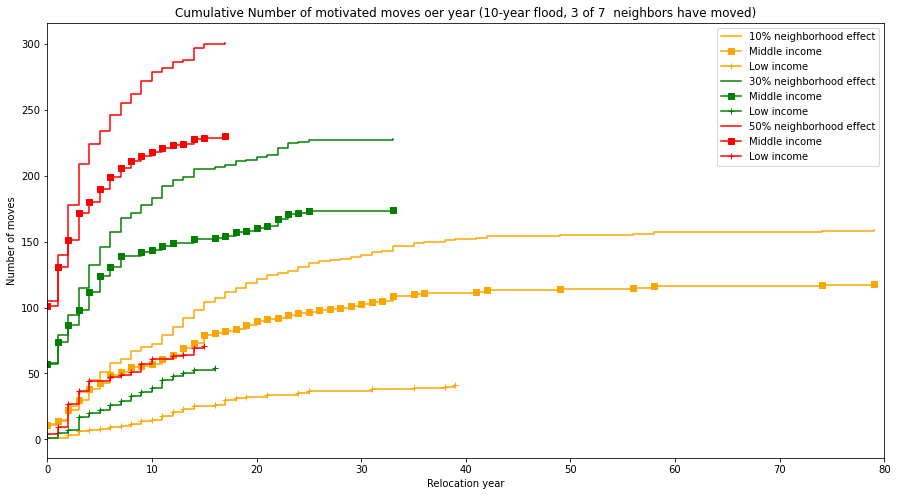

In [44]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative Number of motivated moves oer year (10-year flood, 3 of 7 neighbors have moved)')

df21_count_nb.cumsum().plot(color='orange', ds='steps-post')
df21_count_nb_normal.cumsum().plot(color='orange', Marker="s", ds='steps-post')
df21_count_nb_poor.cumsum().plot(color='orange',Marker="+", ds='steps-post')

df22_count_nb.cumsum().plot(color='green', ds='steps-post')
df22_count_nb_normal.cumsum().plot(color='green', marker="s", ds='steps-post')
df22_count_nb_poor.cumsum().plot(color='green', marker="+", ds='steps-post')


df23_count_nb.cumsum().plot(color='red', ds='steps-post')
df23_count_nb_normal.cumsum().plot(color='red', marker="s", ds='steps-post')
df23_count_nb_poor.cumsum().plot(color='red', marker="+", ds='steps-post')

plt.xlim([0,80])
# plt.ylim([2600,3800])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['10% neighborhood effect','Middle income', 'Low income',
                   '30% neighborhood effect','Middle income', 'Low income',
                   '50% neighborhood effect','Middle income', 'Low income']) 

plt.show()

<Figure size 432x288 with 0 Axes>

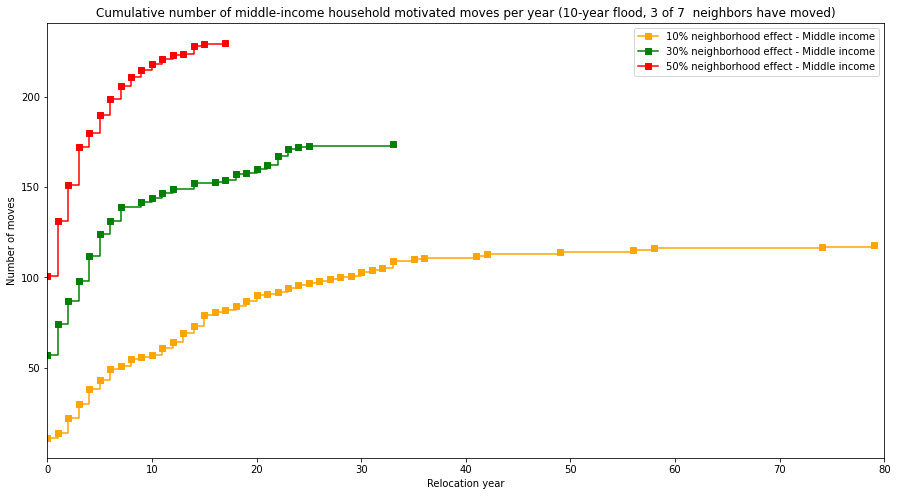

In [46]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative number of middle-income household motivated moves per year (10-year flood, 3 of 7  neighbors have moved)')

df21_count_nb_normal.cumsum().plot(color='orange', Marker="s", ds='steps-post')

df22_count_nb_normal.cumsum().plot(color='green', marker="s", ds='steps-post')

df23_count_nb_normal.cumsum().plot(color='red', marker="s", ds='steps-post')

plt.xlim([0,80])
# plt.ylim([2600,3800])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['10% neighborhood effect - Middle income',
                   '30% neighborhood effect - Middle income',
                   '50% neighborhood effect - Middle income']) 

plt.show()

<Figure size 432x288 with 0 Axes>

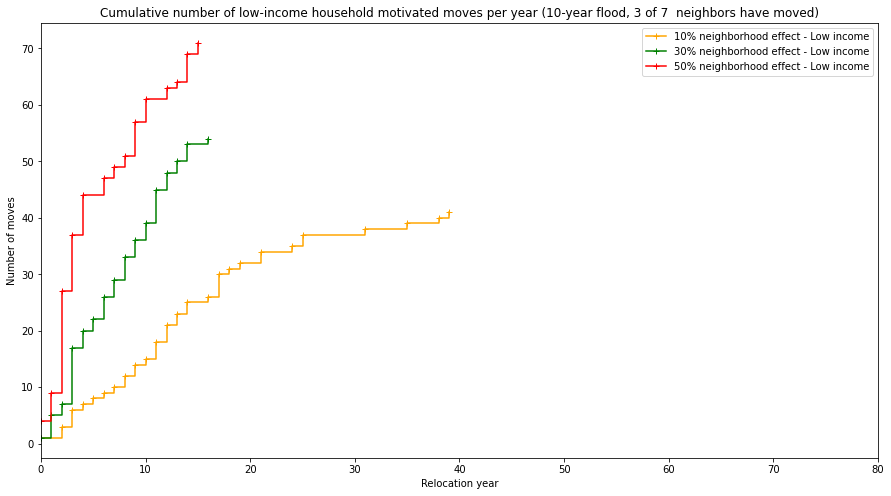

In [47]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative number of low-income household motivated moves per year (10-year flood, 3 of 7  neighbors have moved)')


df21_count_nb_poor.cumsum().plot(color='orange',Marker="+", ds='steps-post')

df22_count_nb_poor.cumsum().plot(color='green', marker="+", ds='steps-post')

df23_count_nb_poor.cumsum().plot(color='red', marker="+", ds='steps-post')

plt.xlim([0,80])
# plt.ylim([2600,3800])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['10% neighborhood effect - Low income',
                   '30% neighborhood effect - Low income',
                   '50% neighborhood effect - Low income']) 

plt.show()

In [49]:
df2_nb_Obj = pd.read_csv('10_100_3of7_Obj.csv')
df21_nb_Obj = pd.read_csv('10_10_3of7_Obj.csv')
df22_nb_Obj = pd.read_csv('10_30_3of7_Obj.csv')
df23_nb_Obj = pd.read_csv('10_50_3of7_Obj.csv')

<Figure size 432x288 with 0 Axes>

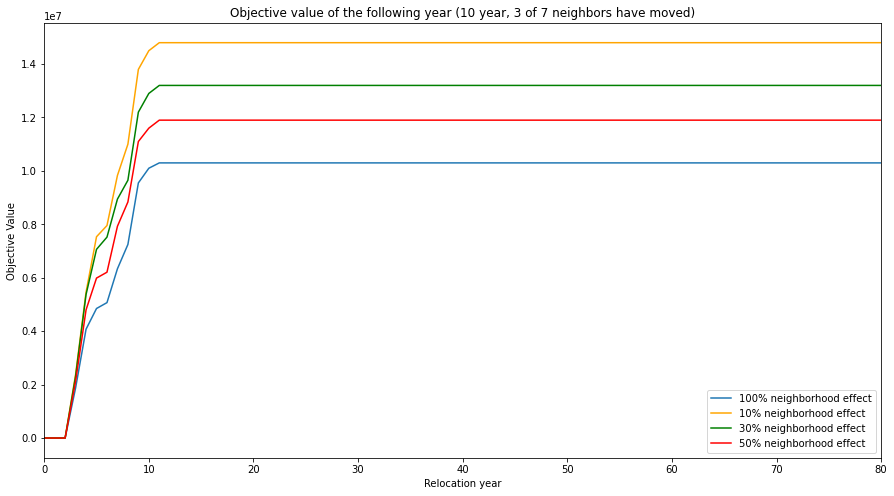

In [50]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Objective value of the following year (10 year, 3 of 7 neighbors have moved)')

df2_nb_Obj.Objective.plot()
df21_nb_Obj.Objective.plot(color='orange')
df22_nb_Obj.Objective.plot(color='green')
df23_nb_Obj.Objective.plot(color='red')

plt.xlim([0,80])

plt.ylabel('Objective Value')
plt.xlabel('Relocation year')

plt.legend(labels=['100% neighborhood effect','10% neighborhood effect','30% neighborhood effect','50% neighborhood effect']) 

plt.show()


In [51]:
df3 = pd.read_csv('10_100_3of10.csv')
df31 = pd.read_csv('10_10_3of10.csv')
df32 = pd.read_csv('10_30_3of10.csv')
df33 = pd.read_csv('10_50_3of10.csv')

In [52]:
# To see how much faster does the neighborhood effect does to encourage self-relocation 
df3['year_diff'] = df3.apply(lambda row: row.ori_year - row.mot_year, axis = 1) 
df31['year_diff'] = df31.apply(lambda row: row.ori_year - row.mot_year, axis = 1) 
df32['year_diff'] = df32.apply(lambda row: row.ori_year - row.mot_year, axis = 1) 
df33['year_diff'] = df33.apply(lambda row: row.ori_year - row.mot_year, axis = 1) 


In [53]:
# To see when people (motivated+self) relocate 
df3_count = df3.mot_year.value_counts().sort_index()
df31_count = df31.mot_year.value_counts().sort_index()
df32_count = df32.mot_year.value_counts().sort_index()
df33_count = df33.mot_year.value_counts().sort_index()
# df1_count


<Figure size 432x288 with 0 Axes>

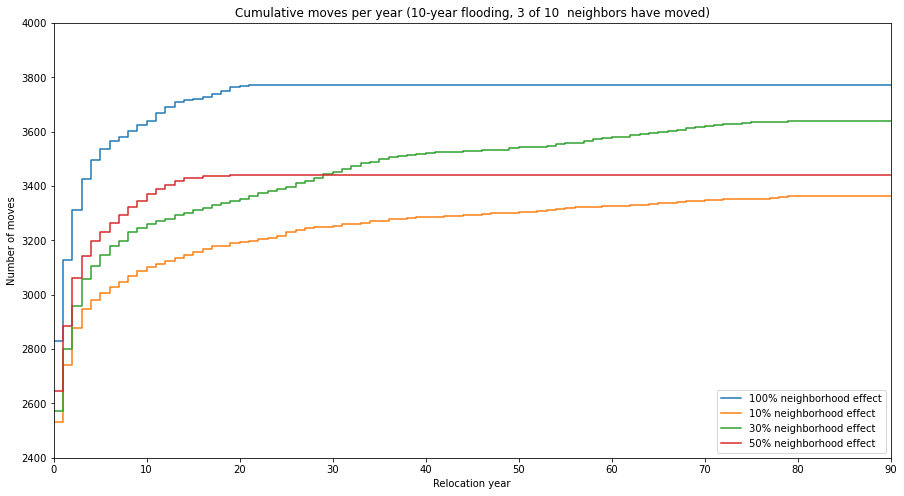

In [63]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative moves per year (10-year flooding, 3 of 10  neighbors have moved)')

df3_count.cumsum().plot(ds='steps-post')
df31_count.cumsum().plot(ds='steps-post')
df32_count.cumsum().plot(ds='steps-post')
df33_count.cumsum().plot(ds='steps-post')

plt.xlim([0,90])
plt.ylim([2400,4000])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['100% neighborhood effect','10% neighborhood effect','30% neighborhood effect','50% neighborhood effect']) 

plt.show()

<Figure size 432x288 with 0 Axes>

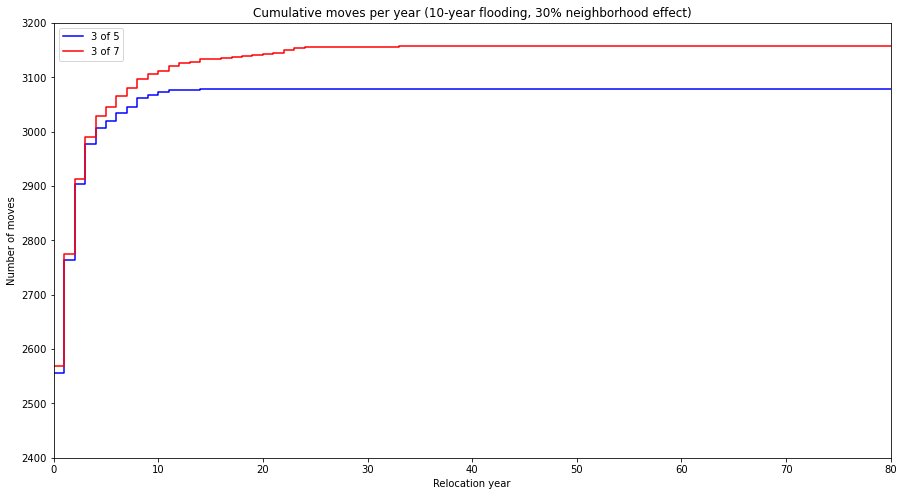

In [64]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative moves per year (10-year flooding, 30% neighborhood effect)')

# df1_count.cumsum().plot(ds='steps-post', color = 'blue')
# df2_count.cumsum().plot(ds='steps-post', color = 'red')
# # df3_count.cumsum().plot(ds='steps-post')

# df11_count.cumsum().plot(ds='steps-post', color = 'blue')
# df21_count.cumsum().plot(ds='steps-post', color = 'red')
# df31_count.cumsum().plot(ds='steps-post')

df12_count.cumsum().plot(ds='steps-post', color = 'blue')
df22_count.cumsum().plot(ds='steps-post', color = 'red')
# # df32_count.cumsum().plot(ds='steps-post')

# df13_count.cumsum().plot(ds='steps-post', color = 'blue')
# df23_count.cumsum().plot(ds='steps-post', color = 'red')
# # df33_count.cumsum().plot(ds='steps-post')

plt.xlim([0,80])
plt.ylim([2400,3200])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['3 of 5','3 of 7']) 

plt.show()

<Figure size 432x288 with 0 Axes>

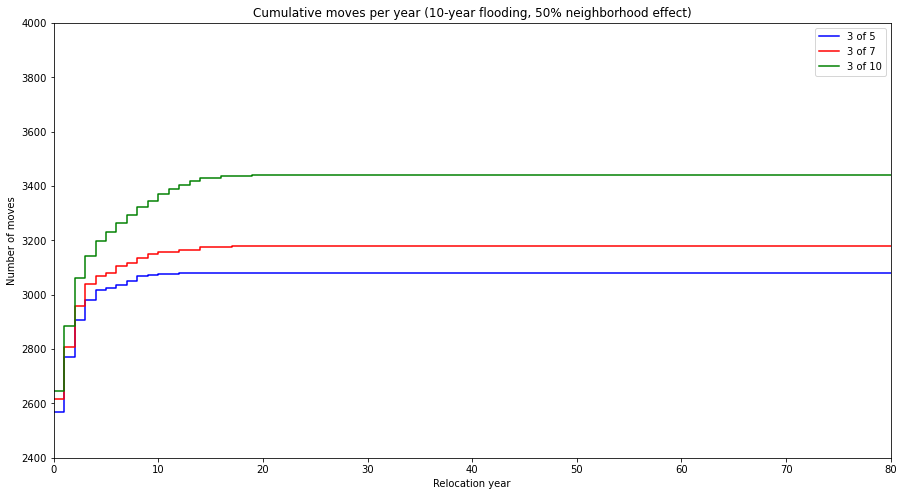

In [78]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative moves per year (10-year flooding, 50% neighborhood effect)')

# 100%
# df1_count.cumsum().plot(ds='steps-post', color = 'blue')
# df2_count.cumsum().plot(ds='steps-post', color = 'red')
# df3_count.cumsum().plot(ds='steps-post', color = 'green')

# 10%
# df11_count.cumsum().plot(ds='steps-post', color = 'blue')
# df21_count.cumsum().plot(ds='steps-post', color = 'red')
# df31_count.cumsum().plot(ds='steps-post', color = 'green')

# 30%
# df12_count.cumsum().plot(ds='steps-post', color = 'blue')
# df22_count.cumsum().plot(ds='steps-post', color = 'red')
# df32_count.cumsum().plot(ds='steps-post', color = 'green')

# 50%
df13_count.cumsum().plot(ds='steps-post', color = 'blue')
df23_count.cumsum().plot(ds='steps-post', color = 'red')
df33_count.cumsum().plot(ds='steps-post', color = 'green')

plt.xlim([0,80])
plt.ylim([2400,4000])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['3 of 5','3 of 7','3 of 10']) 

plt.show()

In [81]:
df3_nb = pd.read_csv('10_100_3of10.csv')
df31_nb = pd.read_csv('10_10_3of10.csv')
df32_nb = pd.read_csv('10_30_3of10.csv')
df33_nb = pd.read_csv('10_50_3of10.csv')


In [82]:

index_name = df31_nb[(df31_nb['normal_inf?'] == '0') & (df31_nb['poor_inf?'] == '0')].index 
df31_nb.drop(index_name, inplace = True) 

index_name = df32_nb[(df32_nb['normal_inf?'] == '0') & (df32_nb['poor_inf?'] == '0')].index 
df32_nb.drop(index_name, inplace = True)

index_name = df33_nb[(df33_nb['normal_inf?'] == '0') & (df33_nb['poor_inf?'] == '0')].index 
df33_nb.drop(index_name, inplace = True)

In [83]:
index_name = df31_nb[(df31_nb['normal_inf?'] == '0') & (df31_nb['poor_inf?'] == '0')].index 
df31_nb.drop(index_name, inplace = True) 

index_name = df32_nb[(df32_nb['normal_inf?'] == '0') & (df32_nb['poor_inf?'] == '0')].index 
df32_nb.drop(index_name, inplace = True)

index_name = df33_nb[(df33_nb['normal_inf?'] == '0') & (df33_nb['poor_inf?'] == '0')].index 
df33_nb.drop(index_name, inplace = True)



In [84]:
df3_count_nb = df3.mot_year.value_counts().sort_index()
df31_count_nb = df31_nb.mot_year.value_counts().sort_index()
df32_count_nb = df32_nb.mot_year.value_counts().sort_index()
df33_count_nb = df33_nb.mot_year.value_counts().sort_index()
# df12_count_nb


<Figure size 432x288 with 0 Axes>

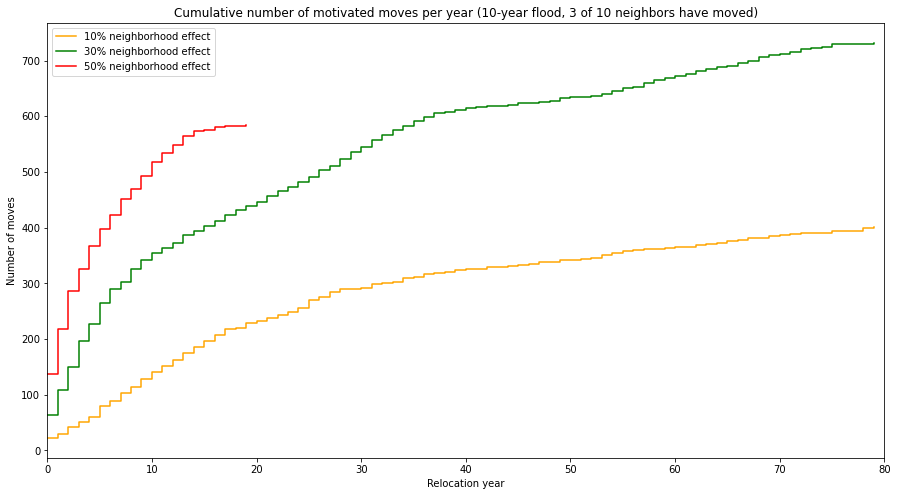

In [85]:
# clear current figure
plt.clf()
fig = figure(figsize=(15, 8))
plt.title('Cumulative number of motivated moves per year (10-year flood, 3 of 10 neighbors have moved)')

df31_count_nb.cumsum().plot(ds='steps-post',color ='orange')
df32_count_nb.cumsum().plot(ds='steps-post',color ='green')
df33_count_nb.cumsum().plot(ds='steps-post',color ='red')

plt.xlim([0,80])

plt.ylabel('Number of moves')
plt.xlabel('Relocation year')

plt.legend(labels=['10% neighborhood effect','30% neighborhood effect','50% neighborhood effect','50% neighborhood effect']) 

plt.show()